In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('transaction_data.csv')

In [97]:
data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [101]:
data['date'] = pd.to_datetime(data.date)
data['minute'] = data.date.dt.minute
data

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [102]:
data_plot = data.groupby('transaction', as_index=False).agg({'name': 'count'})
data_plot

,transaction,name
0,cancelled,1619
1,error,4
2,successfull,3692


<AxesSubplot:xlabel='transaction', ylabel='name'>

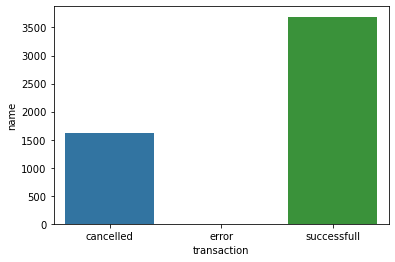

In [103]:
sns.barplot(x='transaction', y='name', data=data_plot)

In [104]:
num_transactions = data[data.transaction == 'successfull'].groupby('name', as_index=False).agg({'transaction': 'count'})
num_transactions.transaction.mean()
num_transactions.groupby('transaction').agg({'name': 'count'})

,name
transaction,
46,1
52,1
55,2
56,1
57,1
58,1
59,3
60,3
61,2


<AxesSubplot:xlabel='transaction', ylabel='Count'>

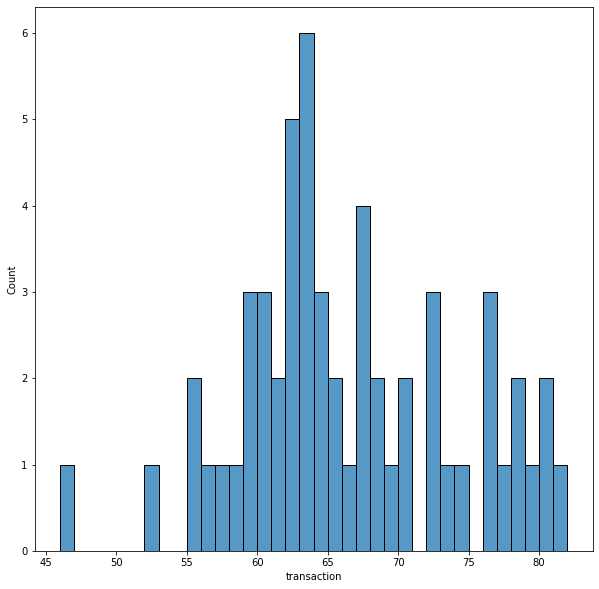

In [105]:
plt.figure(figsize=(10, 10))
sns.histplot(data=num_transactions, x='transaction', binwidth=1)

In [124]:
data_upd = pd.read_csv('transaction_data_updated.csv')
data_upd.date = pd.to_datetime(data_upd.date)
data_upd['true_minute'] = data_upd.date.dt.hour*60 + data_upd.date.dt.minute
data_upd

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


<AxesSubplot:xlabel='true_minute', ylabel='name'>

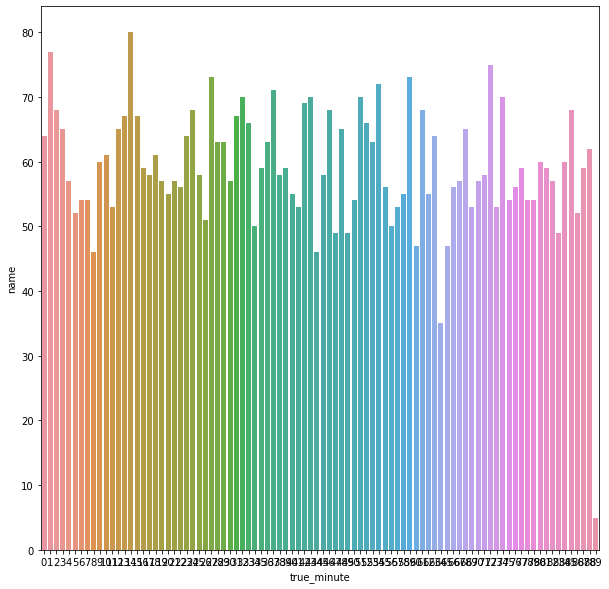

In [126]:
user_vs_minute_pivot = data_upd.groupby(['true_minute', 'name'], as_index=False).agg({'transaction': 'count'}) \
                               .pivot(index='true_minute', columns='name', values='transaction').fillna(0)
data_upd_tpm = data_upd.groupby('true_minute', as_index=False).agg({'name': 'count'})
plt.figure(figsize=(10, 10))
sns.barplot(x='true_minute', y='name', data=data_upd_tpm)